In [2425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import re


In [2426]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
print(train_data.head())
# print(train_data[::20])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2427]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2428]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [2429]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

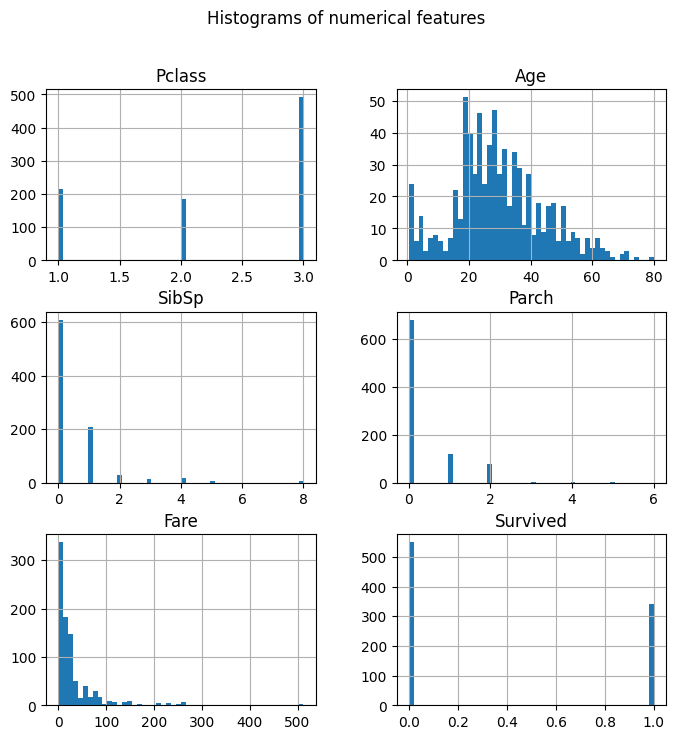

In [2430]:
hist_data = train_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived']]
hist_data.hist(bins=50, figsize=(8,8))
plt.suptitle('Histograms of numerical features')

plt.savefig('../figures/histograms.jpeg')

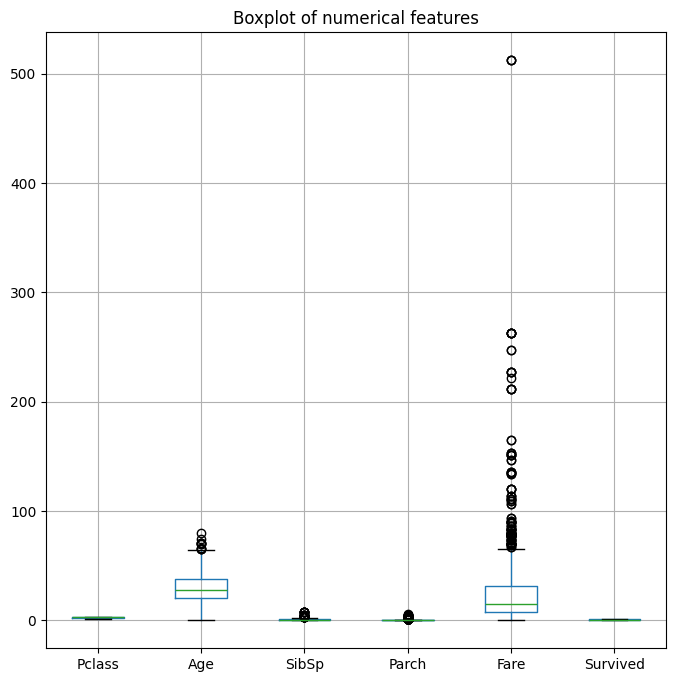

In [2431]:
boxplot_data = train_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
boxplot_data.boxplot(figsize=(8,8))
plt.title('Boxplot of numerical features')
plt.savefig('../figures/boxplot.jpeg')

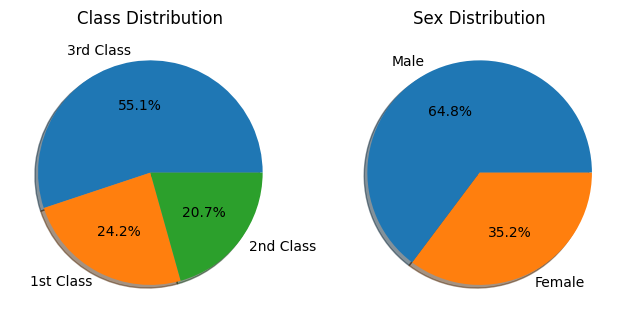

In [2432]:
fig, ax = plt.subplots(1,2)

pclass_count = train_data['Pclass'].value_counts()

ax[0].pie(pclass_count, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', shadow=True)
ax[0].set_title('Class Distribution')
pclass_count

sex_count = train_data['Sex'].value_counts()

ax[1].pie(sex_count, labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True)
ax[1].set_title('Sex Distribution')
sex_count

# sibsp_count = train_data['SibSp'].value_counts()

# ax[1][1].bar(sibsp_count.index, sibsp_count.values)
# ax[1][1].set_title('Siblings/Spouse Distribution')
# sibsp_count


# parch_count = train_data['Parch'].value_counts()

# ax[2][0].bar(parch_count.index, parch_count.values)
# ax[2][0].set_title('Parent/Children Distribution')
# parch_count

plt.tight_layout()
plt.savefig('../figures/pclass_and_sex.jpeg')



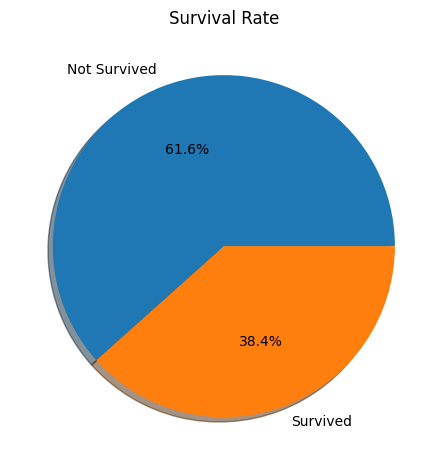

In [2433]:
fig, ax = plt.subplots()

survival_count = train_data['Survived'].value_counts()

ax.pie(survival_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', shadow=True)
ax.set_title('Survival Rate')
plt.tight_layout()
survival_count

plt.savefig('../figures/survival_rate.jpeg')



In [2434]:
# decide not to impute
cabin_count = train_data['Cabin'].value_counts().sort_index()
# cabin_count = train_data['Cabin'].value_counts()
print(cabin_count[::10])
# print(cabin_count.tail())

def extract_cabin_letter(cabin):
    if pd.isna(cabin):
        return np.nan

    match = re.search(r'^([A-GT])*+', str(cabin))
    if match:
        return match.group(1)
    else:
        return np.nan

train_data['Cabin'] = train_data['Cabin'].apply(extract_cabin_letter)
train_data['Cabin'].value_counts().sort_index()

Cabin
A10      1
A34      1
B22      2
B42      1
B77      2
C104     1
C148     1
C50      1
C83      2
D        3
D30      1
D50      1
E24      2
E49      1
F G73    2
Name: count, dtype: int64


Cabin
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: count, dtype: int64

In [2435]:
# create col with impute cabin
cabin_mode = train_data['Cabin'].mode()[0]
train_data['Cabin_impute'] = train_data['Cabin'].fillna(cabin_mode)
train_data['Cabin_impute'].value_counts().sort_index()


Cabin_impute
A     15
B     47
C    746
D     33
E     32
F     13
G      4
T      1
Name: count, dtype: int64

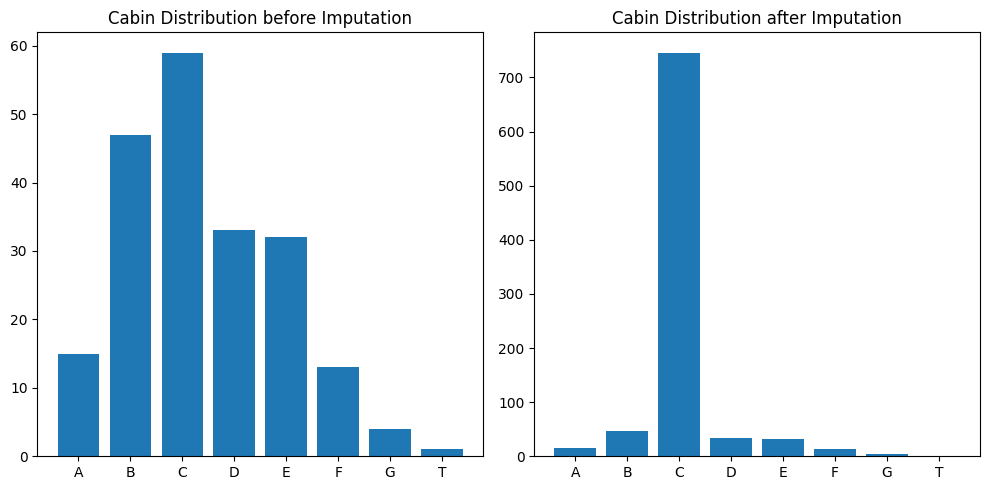

In [2436]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

cabin_count = train_data['Cabin'].value_counts().sort_index()
ax[0].bar(cabin_count.index, cabin_count.values)
ax[0].set_title('Cabin Distribution before Imputation')


cabin_inputed_count = train_data['Cabin_impute'].value_counts().sort_index()
ax[1].bar(cabin_inputed_count.index, cabin_inputed_count.values)
ax[1].set_title('Cabin Distribution after Imputation')

plt.tight_layout()

plt.savefig('../figures/cabin_imputation.jpeg')


In [2437]:
# create col with impute embarked
embark_mode = train_data['Embarked'].mode()[0]
train_data['Embarked_impute'] = train_data['Embarked'].fillna(embark_mode)

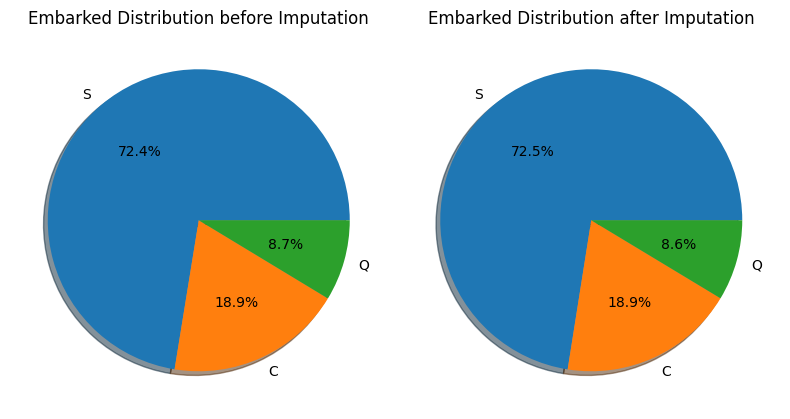

In [2438]:
embark_count = train_data['Embarked'].value_counts()
embark_count
fig, ax = plt.subplots(1,2, figsize=(8,4.5))

ax[0].pie(embark_count, labels=['S', 'C', 'Q'], autopct='%1.1f%%', shadow=True)
ax[0].set_title('Embarked Distribution before Imputation')

embark_impute_count = train_data['Embarked_impute'].value_counts()

train_data['Embarked_impute'].value_counts()
ax[1].pie(embark_impute_count, labels=['S', 'C', 'Q'], autopct='%1.1f%%', shadow=True)
ax[1].set_title('Embarked Distribution after Imputation')

plt.tight_layout()

plt.savefig('../figures/embarked_imputation.jpeg')

In [2439]:
# impute embarked
train_data['Embarked'] = train_data['Embarked_impute']
train_data = train_data.drop(columns=['Embarked_impute'])

In [2440]:
# create col with impute age
age_median = train_data['Age'].median()
train_data['Age_impute'] = train_data['Age'].fillna(age_median)

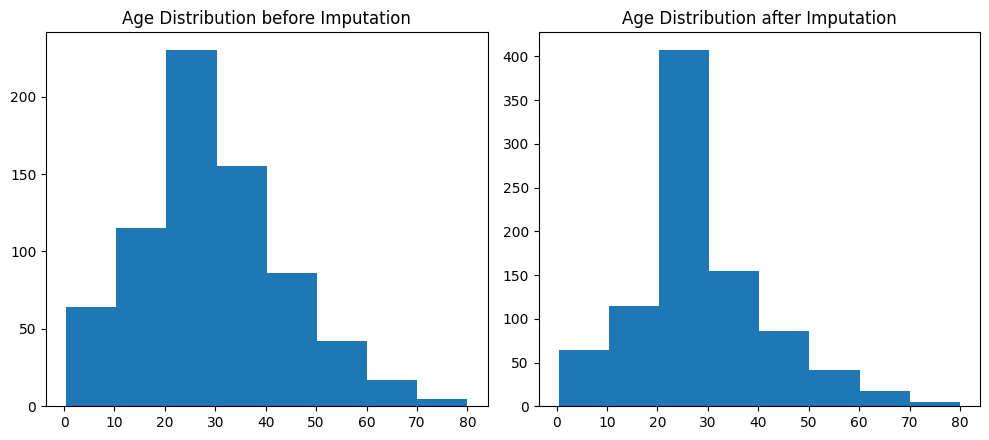

In [2441]:
age_count = train_data['Age'].value_counts().sort_index()
age_count

fig, ax = plt.subplots(1,2, figsize=(10,4.5))

ax[0].hist(train_data['Age'], bins=8)
ax[0].set_title('Age Distribution before Imputation')

age_impute_count = train_data['Age_impute'].value_counts().sort_index()

ax[1].hist(train_data['Age_impute'], bins=8)
ax[1].set_title('Age Distribution after Imputation')

plt.tight_layout()

plt.savefig('../figures/age_imputation.jpeg')

In [2442]:
# impute age
train_data['Age'] = train_data['Age_impute']
train_data = train_data.drop(columns=['Age_impute'])

In [2443]:
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Cabin_impute      0
dtype: int64

In [2444]:
# encode sex
sex_enc = OneHotEncoder(sparse_output=False)
sex_enc.fit(train_data['Sex'].values.reshape(-1,1))
encoded_sex_arr = sex_enc.transform(train_data['Sex'].values.reshape(-1,1))
encoded_sex_df = pd.DataFrame(encoded_sex_arr,columns=sex_enc.get_feature_names_out(['Sex']))
encoded_sex_df


,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [2445]:
train_data = pd.concat([train_data, encoded_sex_df], axis=1)
train_data = train_data.drop(columns=['Sex'])

In [2446]:
# encode embarked
embark_enc = OneHotEncoder(sparse_output=False)
embark_enc.fit(train_data['Embarked'].values.reshape(-1,1))
embark_encoded_arr = embark_enc.transform(train_data['Embarked'].values.reshape(-1,1))
embark_encoded_df = pd.DataFrame(embark_encoded_arr, columns=embark_enc.get_feature_names_out(['Embarked']))
embark_encoded_df


,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [2447]:
train_data = pd.concat([train_data, embark_encoded_df], axis=1)
train_data = train_data.drop(columns=['Embarked'])

In [2448]:
# scale data
# std_scaler = StandardScaler()

# X_train = std_scaler.fit_transform(X_train)
# X_val = std_scaler.transform(X_val)

# rob_scaler = RobustScaler()

# X_train = rob_scaler.fit_transform(X_train)
# X_val = rob_scaler.transform(X_val)

minmax_scaler = MinMaxScaler(feature_range=(0,1))

minmax_scaler.fit(X_train)
X_train = minmax_scaler.transform(X_train)

In [2449]:
corr_matrix = train_data.corr(numeric_only=True)

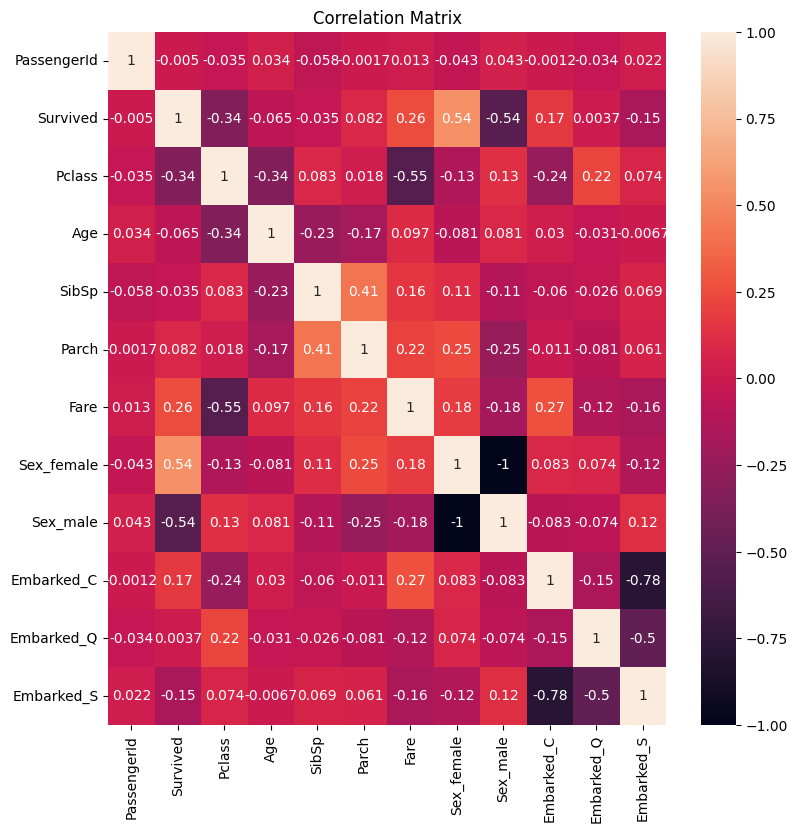

In [2450]:
plt.figure(figsize=(9,9))

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.jpeg')

In [2451]:
# drop columns that are not useful
train_data = train_data.drop(columns=['Name', 'Ticket', 'PassengerId'])
# train_data

In [2452]:
# decided not to impute cabin
train_data = train_data.drop(columns=['Cabin', 'Cabin_impute'])
# train_data

In [2453]:
X = train_data[['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = train_data.Survived

In [2454]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32)

In [2455]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [2456]:
y_pred = log_reg.predict(X_val)

In [2457]:
survival_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
survival_df

,Actual,Predicted
837,0,0
334,1,1
849,1,1
778,0,0
413,0,0
...,...,...
74,1,0
700,1,1
770,0,0
559,1,0


In [2458]:
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix

array([[93, 15],
       [20, 51]])

In [2459]:
accuracy = accuracy_score(y_val, y_pred)
print(f'accuracy score: {accuracy}')

accuracy score: 0.8044692737430168


In [2460]:
recall = recall_score(y_val, y_pred)
print(f'recall score: {recall}')

recall score: 0.7183098591549296


In [2461]:
precision = precision_score(y_val, y_pred)
print(f'precision score: {precision}')

precision score: 0.7727272727272727


In [2462]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64